In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import statsmodels.formula.api as smf

%matplotlib inline

## Importing, filtering and normalizing datasets

Importing **DMSO 24hr expt1** as **adata_ref** and **Idasanutlin 24hr expt1** as **adata**.

In [2]:
adata_ref =sc.read_10x_mtx('../data/DMSO_24hr_expt1/') 

In [3]:
adata = sc.read_10x_mtx('../data/Idasanutlin_24hr_expt1/')

In [4]:
adata_ref.strings_to_categoricals()
adata.strings_to_categoricals()

Creating dataframe.

In [5]:
adata_ref.to_df() 
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGATCCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGATGTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGAGCCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGCGTCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTACCTACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATACTACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTGATGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTCACGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCAGAGGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [6]:
sc.pp.filter_cells(adata_ref, min_genes=200)
sc.pp.filter_genes(adata_ref, min_cells=3)

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes. The values have been adjusted according to the scatter plots seen in the exploratory notebooks.

In [7]:
adata_ref.var['mt'] = adata_ref.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata_ref, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [8]:
adata_ref = adata_ref[adata_ref.obs.n_genes_by_counts < 5000, :] 
adata_ref = adata_ref[adata_ref.obs.pct_counts_mt < 20, :]

adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing. Defining the data on the same variables to be able to run `sc.tl.ingest`. Running principal component analysis (PCA), computing the neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [9]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)

In [11]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [13]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

## Adding metadata

Metadata is included from both the *Classifications.csv* files and the <a href="https://depmap.org/portal/download/" target="_blank">DepMap</a> database. Necessary datasets to download from DepMap linked below.
Specifying **meta_ref** as **DMSO 24h expt1 metadata** and **meta** as **Idasanutlin 24h expt1 metadata**. Metadata are added to adata.

In [14]:
meta_ref = pd.read_csv('../data/DMSO_24hr_expt1/classifications.csv', sep=',', header=0, index_col=0)

In [15]:
adata_ref.obs['Cell type'] = meta_ref.loc[adata_ref.obs.index, 'singlet_ID']

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [16]:
meta = pd.read_csv('../data/Idasanutlin_24hr_expt1/classifications.csv', sep=',', header=0, index_col=0)

In [17]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [18]:
adata.obs['DepMap_ID'] = meta.loc[adata.obs.index, 'DepMap_ID']
adata_ref.obs['DepMap_ID'] = meta_ref.loc[adata_ref.obs.index, 'DepMap_ID']

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


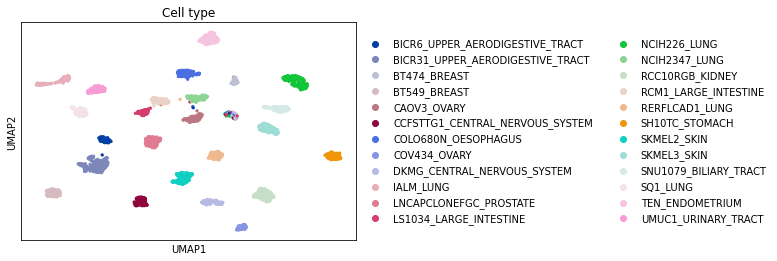

In [19]:
sc.pl.umap(adata_ref, color='Cell type') 

## Filtering for TP53 variants, adding mutation counts

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261527" target="_blank">CCLE_mutations.csv </a> to download.

Since Idasanutlin is an MDM2 p53 binding protein homolog antagonist, we are filtering for TP53 variants.

In [20]:
mut = pd.read_csv('../data/DepMap/CCLE_mutations.csv', sep='\t', header=0, index_col=None)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
fil = mut['Hugo_Symbol'] == 'TP53'    
mut = mut[fil]

In [22]:
mut['Variant_Classification'].value_counts()

Missense_Mutation    872
Nonsense_Mutation    151
Splice_Site          131
Frame_Shift_Del       96
Frame_Shift_Ins       30
Silent                25
In_Frame_Del          20
In_Frame_Ins           6
Name: Variant_Classification, dtype: int64

Excluding silent mutations since they won't affect the function of Idasanutlin.

In [23]:
fil = mut['Variant_Classification'] != 'Silent'
mut = mut[fil]

Verifying mutation counts by DepMap IDs.

In [24]:
mut_count = mut['DepMap_ID'].value_counts()
mut_count

ACH-000937    5
ACH-000339    5
ACH-000993    5
ACH-000744    4
ACH-000835    4
             ..
ACH-001172    1
ACH-000798    1
ACH-002307    1
ACH-000720    1
ACH-000905    1
Name: DepMap_ID, Length: 1091, dtype: int64

Adding mutation counts to dataframes as *'TP53_mut_count'*.

In [25]:
adata_ref.obs['TP53_mut_count'] = 0.0
adata_ref.obs['TP53_mut_count'] = adata_ref.obs['DepMap_ID'].map(mut_count)
adata_ref.obs['TP53_mut_count'] = adata_ref.obs['TP53_mut_count'].fillna(0)

In [26]:
adata.obs['TP53_mut_count'] = 0.0
adata.obs['TP53_mut_count'] = adata.obs['DepMap_ID'].map(mut_count)
adata.obs['TP53_mut_count'] = adata.obs['TP53_mut_count'].fillna(0)

## Adding copy number variation

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261524" target="_blank">CCLE_gene_cn.csv </a> to download.

In [27]:
cnv = pd.read_csv('../data/DepMap/CCLE_gene_cn.csv', sep=',', header=0, index_col=0)

Filtering TP53 genes.

In [28]:
cnv_TP53 = cnv.loc[:,cnv.columns.str.startswith("TP53")]
cnv_TP53

,TP53TG3HP (100130700),TP53TG1 (11257),TP53RK (112858),TP53TG5 (27296),TP53INP2 (58476),TP53AIP1 (63970),TP53 (7157),TP53BP1 (7158),TP53BP2 (7159),TP53TG3D (729264),TP53I13 (90313),TP53INP1 (94241),TP53I11 (9537),TP53I3 (9540)
ACH-000001,0.738211,0.953195,1.199020,1.199020,1.199020,0.726876,0.742698,0.930416,0.995046,0.738211,1.223429,0.885961,1.213402,0.995963
ACH-000002,1.015739,1.004020,1.012577,1.012577,1.012577,0.996967,0.000003,0.986230,1.009073,1.015739,1.015305,0.981249,0.996967,1.000845
ACH-000003,0.948359,1.116181,1.524481,1.524481,1.524481,1.384383,0.649156,0.876896,1.795070,0.921603,1.116990,1.034247,1.088032,1.092540
ACH-000004,0.824302,0.833216,0.836336,0.836336,1.495670,1.684676,0.808400,1.087132,1.060779,0.821563,1.055944,1.261852,0.815242,1.073009
ACH-000005,0.813705,0.821698,0.816603,0.816603,1.572602,1.857809,0.818548,1.119510,1.084702,0.813705,1.085764,1.321933,0.833802,1.087032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002510,0.694136,1.149565,0.961169,0.961169,1.164963,1.138698,1.083408,0.992001,1.029565,1.163377,1.083408,0.960984,1.310884,1.155325
ACH-002511,0.929665,0.681380,1.327255,1.327255,1.353546,0.389522,0.716854,0.698785,1.114513,0.929665,0.982058,1.166019,1.028324,0.882868
ACH-001421,0.978355,0.976895,0.979534,0.979534,0.979534,0.966044,0.974189,0.977533,0.557705,0.978355,0.969942,0.963633,0.985983,1.265056
ACH-001711,0.855166,1.089226,1.125984,1.125984,1.125984,1.124508,1.127179,1.062906,1.113815,0.855166,1.127179,1.249580,1.127647,1.003055


In [29]:
cnv = cnv_TP53['TP53 (7157)']
cnv

ACH-000001    0.742698
ACH-000002    0.000003
ACH-000003    0.649156
ACH-000004    0.808400
ACH-000005    0.818548
                ...   
ACH-002510    1.083408
ACH-002511    0.716854
ACH-001421    0.974189
ACH-001711    1.127179
ACH-001656    0.607227
Name: TP53 (7157), Length: 1745, dtype: float64

Adding TP53 copy number variation to dataframes as *'TP53_cnv'*.

In [30]:
adata.obs['TP53_cnv'] = adata.obs['DepMap_ID'].map(cnv)
adata_ref.obs['TP53_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv)

In [31]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,TP53_mut_count,TP53_cnv
AAACCTGAGATCCTGT-1,2113,2113,5398.0,302.0,5.594665,RERFLCAD1_LUNG,ACH-000791,3.0,0.790245
AAACCTGAGGATGTAT-1,4544,4542,26432.0,1728.0,6.537530,TEN_ENDOMETRIUM,ACH-000397,1.0,0.678295
AAACCTGCAGAGCCAA-1,2314,2313,7029.0,1250.0,17.783468,SKMEL2_SKIN,ACH-001190,1.0,0.593866
AAACCTGCAGCGTCCA-1,2564,2564,10054.0,907.0,9.021285,RCM1_LARGE_INTESTINE,ACH-000565,1.0,0.739898
AAACCTGGTACCTACA-1,2357,2357,8190.0,413.0,5.042735,LS1034_LARGE_INTESTINE,ACH-000252,1.0,0.734671
...,...,...,...,...,...,...,...,...,...
TTTGTCACATACTACG-1,3987,3985,18215.0,845.0,4.639034,SKMEL2_SKIN,ACH-001190,1.0,0.593866
TTTGTCAGTGATGTCT-1,2672,2670,7425.0,471.0,6.343434,BICR31_UPPER_AERODIGESTIVE_TRACT,ACH-000228,1.0,0.905951
TTTGTCAGTTCACGGC-1,2577,2576,7015.0,207.0,2.950819,BICR31_UPPER_AERODIGESTIVE_TRACT,ACH-000228,1.0,0.905951
TTTGTCATCAGAGGTG-1,4724,4723,28079.0,2154.0,7.671213,RCM1_LARGE_INTESTINE,ACH-000565,1.0,0.739898


In [32]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,TP53_mut_count,TP53_cnv
AAACCTGAGTGTCCAT-1,4146,4146,27650.0,1071.0,3.873418,NCIH226_LUNG,ACH-000367,0.0,1.099889
AAACCTGTCTCCTATA-1,3364,3361,13042.0,930.0,7.130808,SH10TC_STOMACH,ACH-000764,1.0,0.903123
AAACGGGAGGCATGTG-1,3175,3174,15211.0,1438.0,9.453685,UMUC1_URINARY_TRACT,ACH-000834,1.0,0.827626
AAACGGGAGTGCCATT-1,3192,3192,13045.0,550.0,4.216175,COLO680N_OESOPHAGUS,ACH-000717,1.0,1.229084
AAACGGGCAGGTCGTC-1,3672,3671,25405.0,525.0,2.066522,NCIH226_LUNG,ACH-000367,0.0,1.099889
...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTCCTCT-1,3897,3896,19128.0,720.0,3.764115,CAOV3_OVARY,ACH-000713,1.0,0.680678
TTTGTCAAGTCTCAAC-1,3818,3817,22015.0,602.0,2.734499,RCC10RGB_KIDNEY,ACH-000189,0.0,0.905364
TTTGTCAAGTTGTAGA-1,4019,4019,27120.0,1774.0,6.541297,IALM_LUNG,ACH-000672,1.0,0.863335
TTTGTCACATGAAGTA-1,4182,4182,24644.0,749.0,3.039279,CAOV3_OVARY,ACH-000713,1.0,0.680678


## Integrating datasets

In [33]:
sc.tl.ingest(adata, adata_ref, obs='Cell type')

Creating a new variable named **adata_concat** that stores the integrated data. We will be using this dataframe from now on.

In [34]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['DMSO', 'Idasanutlin'])

... storing 'DepMap_ID' as categorical


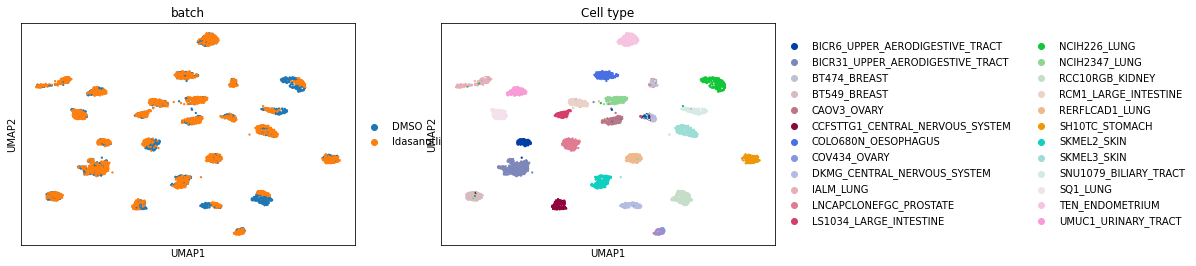

In [35]:
sc.pl.umap(adata_concat, color=['batch', 'Cell type'])

In [36]:
adata_concat.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,TP53_mut_count,TP53_cnv,batch
AAACCTGAGTGTCCAT-1-DMSO,4146,4146,27650.0,1071.0,3.873418,NCIH226_LUNG,ACH-000367,0.0,1.099889,DMSO
AAACCTGTCTCCTATA-1-DMSO,3364,3361,13042.0,930.0,7.130808,SH10TC_STOMACH,ACH-000764,1.0,0.903123,DMSO
AAACGGGAGGCATGTG-1-DMSO,3175,3174,15211.0,1438.0,9.453685,UMUC1_URINARY_TRACT,ACH-000834,1.0,0.827626,DMSO
AAACGGGAGTGCCATT-1-DMSO,3192,3192,13045.0,550.0,4.216175,COLO680N_OESOPHAGUS,ACH-000717,1.0,1.229084,DMSO
AAACGGGCAGGTCGTC-1-DMSO,3672,3671,25405.0,525.0,2.066522,NCIH226_LUNG,ACH-000367,0.0,1.099889,DMSO
...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATACTACG-1-Idasanutlin,3987,3985,18215.0,845.0,4.639034,SKMEL2_SKIN,ACH-001190,1.0,0.593866,Idasanutlin
TTTGTCAGTGATGTCT-1-Idasanutlin,2672,2670,7425.0,471.0,6.343434,BICR31_UPPER_AERODIGESTIVE_TRACT,ACH-000228,1.0,0.905951,Idasanutlin
TTTGTCAGTTCACGGC-1-Idasanutlin,2577,2576,7015.0,207.0,2.950819,BICR31_UPPER_AERODIGESTIVE_TRACT,ACH-000228,1.0,0.905951,Idasanutlin
TTTGTCATCAGAGGTG-1-Idasanutlin,4724,4723,28079.0,2154.0,7.671213,RCM1_LARGE_INTESTINE,ACH-000565,1.0,0.739898,Idasanutlin


## Adding transcription factor activity

Transcription factor activities have been calculated. See files: **DoRothEA_DMSO_24h_expt1.R** and **DoRothEA_Idasanutlin_24h_expt1.R** 

In [37]:
tp53_dmso = pd.read_csv('../results/tf_activity_dmso_24h_expt1.csv', sep=',', header=0, index_col=0)
tp53_nutlin = pd.read_csv('../results/tf_activity_idasanutlin_24h_expt1.csv', sep=',', header=0, index_col=0)

Annotating the colum names to avoid mixing up data in the integrated dataframe.

In [38]:
tp53_dmso.columns = tp53_dmso.columns+'-DMSO'
tp53_nutlin.columns = tp53_nutlin.columns+'-Idasanutlin'

Filtering for TP53 again and adding the results to the integrated dataset as *'TP53_activity'*.

In [39]:
tp53_dmso = tp53_dmso.T['TP53']
tp53_nutlin  = tp53_nutlin.T['TP53']
tp53_dmso

AAACCTGAGTGTCCAT-1-DMSO    0.785405
AAACCTGTCTCCTATA-1-DMSO   -1.618581
AAACGGGAGGCATGTG-1-DMSO   -0.632324
AAACGGGAGTGCCATT-1-DMSO   -0.945287
AAACGGGCAGGTCGTC-1-DMSO    0.468654
                             ...   
TTTGTCAAGCTCCTCT-1-DMSO   -1.860658
TTTGTCAAGTCTCAAC-1-DMSO   -0.361074
TTTGTCAAGTTGTAGA-1-DMSO   -3.700711
TTTGTCACATGAAGTA-1-DMSO   -2.387328
TTTGTCAGTCACAAGG-1-DMSO   -0.713897
Name: TP53, Length: 2722, dtype: float64

In [40]:
tp53 = [tp53_dmso, tp53_nutlin]
tp53 = pd.concat(tp53)

In [41]:
tp53

AAACCTGAGTGTCCAT-1-DMSO           0.785405
AAACCTGTCTCCTATA-1-DMSO          -1.618581
AAACGGGAGGCATGTG-1-DMSO          -0.632324
AAACGGGAGTGCCATT-1-DMSO          -0.945287
AAACGGGCAGGTCGTC-1-DMSO           0.468654
                                    ...   
TTTGTCACATACTACG-1-Idasanutlin   -5.715357
TTTGTCAGTGATGTCT-1-Idasanutlin   -0.551403
TTTGTCAGTTCACGGC-1-Idasanutlin   -1.078464
TTTGTCATCAGAGGTG-1-Idasanutlin   -3.810294
TTTGTCATCTTGTTTG-1-Idasanutlin   -1.472183
Name: TP53, Length: 5735, dtype: float64

In [42]:
adata_concat.obs['TP53_activity'] = tp53

In [43]:
adata_concat.var.index

Index(['RP11-34P13.7', 'AL627309.1', 'AP006222.2', 'RP4-669L17.10',
       'RP11-206L10.3', 'RP11-206L10.9', 'FAM87B', 'LINC00115', 'FAM41C',
       'RP11-54O7.1',
       ...
       'MT-ND6', 'MT-CYB', 'AC145212.1', 'MGC39584', 'AC011043.1',
       'AL592183.1', 'AC011841.1', 'AL354822.1', 'PNRC2-1', 'SRSF10-1'],
      dtype='object', length=18715)

# Visualization

Creating plots based on the UMAP coordinates to be able to see the batches, clusters and their names in a better resolution.

In [44]:
adata_ref.obsm['X_umap'][:,0]

array([ 14.33185  ,  18.683361 ,  -9.305845 , ..., -12.708851 ,
         3.2043355,   2.0602686], dtype=float32)

In [45]:
data = pd.DataFrame(index=adata_concat.obs.index,columns=['UMAP1', 'UMAP2', 'Cell_type', 'Batch'])

In [46]:
data['UMAP1'] = adata_concat.obsm['X_umap'][:,0]
data['UMAP2'] = adata_concat.obsm['X_umap'][:,1]
data['Cell_type'] = adata_concat.obs['Cell type']
data['Batch'] = adata_concat.obs['batch']
data['TP53_activity'] = adata_concat.obs['TP53_activity']
data['DepMap_ID'] = adata_concat.obs['DepMap_ID']

In [47]:
umap_centers = data.groupby('Cell_type').mean()

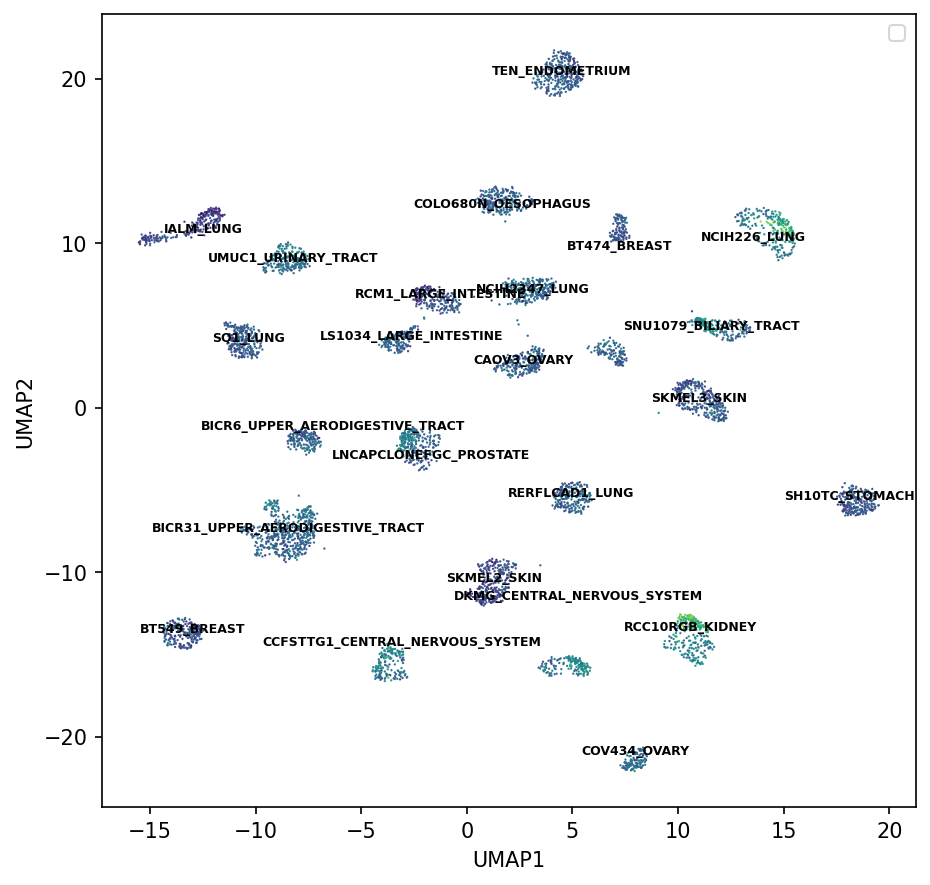

In [48]:
plt.figure(figsize=(7,7), dpi=150)
sns.scatterplot(x= data['UMAP1'], y=data['UMAP2'],  marker="o", edgecolor='face', hue=data['TP53_activity'], 
                s=1, palette="viridis",   )        
plt.legend([])
for cell in umap_centers.index:
    plt.text(umap_centers.loc[cell, 'UMAP1'], umap_centers.loc[cell, 'UMAP2'], cell, size=6, weight='bold',
            horizontalalignment='center')

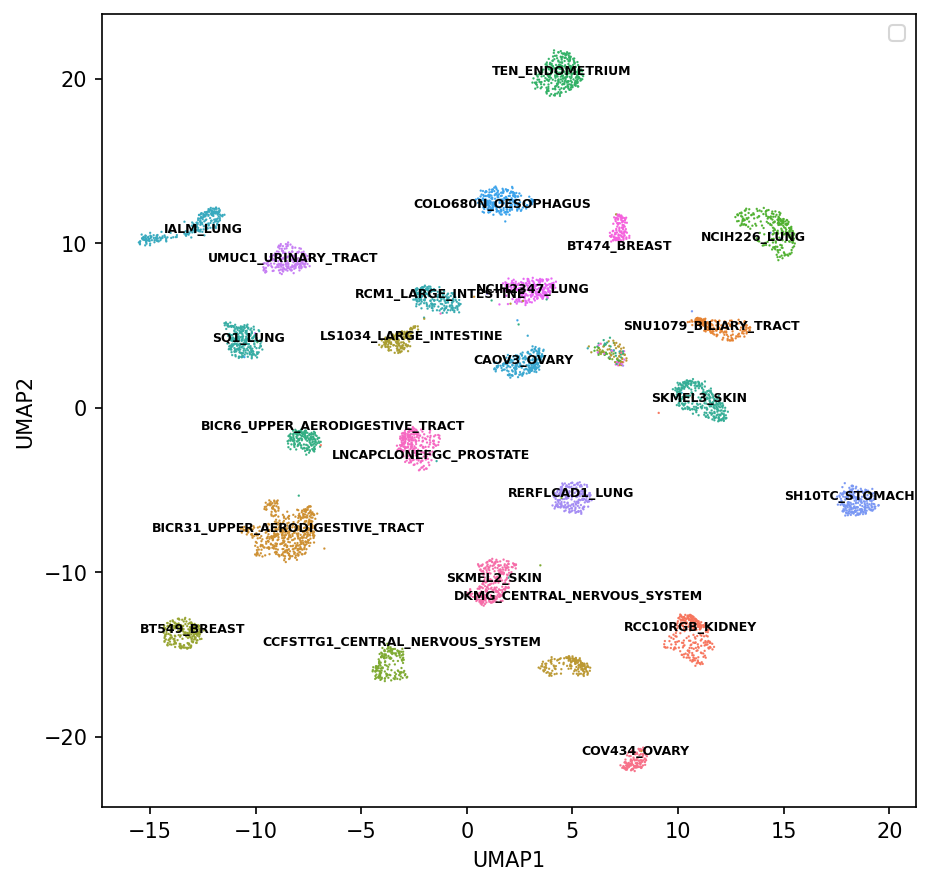

In [49]:
plt.figure(figsize=(7,7), dpi=150)
sns.scatterplot(x= data['UMAP1'], y=data['UMAP2'],  marker="o", edgecolor='face', hue=data['DepMap_ID'], 
                s=1, )        
plt.legend([])
for cell in umap_centers.index:
    plt.text(umap_centers.loc[cell, 'UMAP1'], umap_centers.loc[cell, 'UMAP2'], cell, size=6, weight='bold',
            horizontalalignment='center')

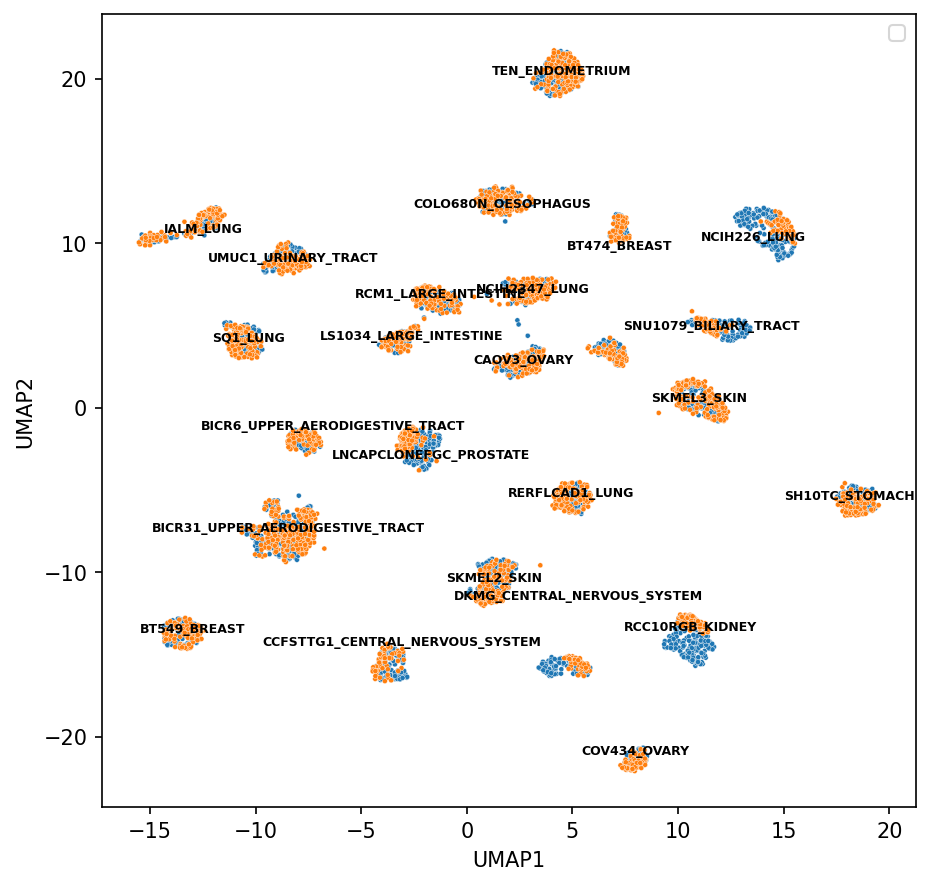

In [50]:
plt.figure(figsize=(7,7), dpi=150)
sns.scatterplot(x= data['UMAP1'], y=data['UMAP2'], hue=data['Batch'],s=6)
plt.legend([])
for cell in umap_centers.index:
    plt.text(umap_centers.loc[cell, 'UMAP1'], umap_centers.loc[cell, 'UMAP2'], cell, size=6, weight='bold',
            horizontalalignment='center')

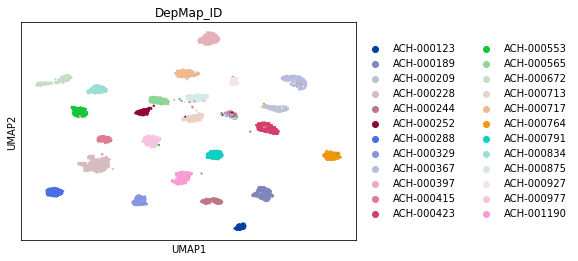

In [51]:
sc.pl.umap(adata_concat, color = 'DepMap_ID')

The clusters contain cells profusely from the same cell line.

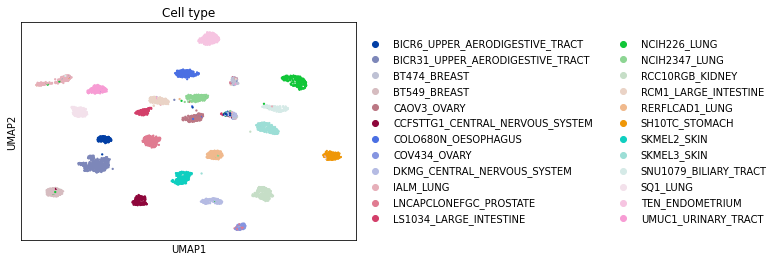

In [52]:
sc.pl.umap(adata_concat, color=['Cell type']) 

The batches are comparable to TP53 activity. The presence of TP53 gene, the copy number variations and the mutation counts are also depicted.

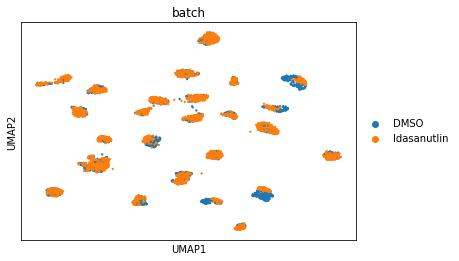

In [53]:
sc.pl.umap(adata_concat, color=['batch'])

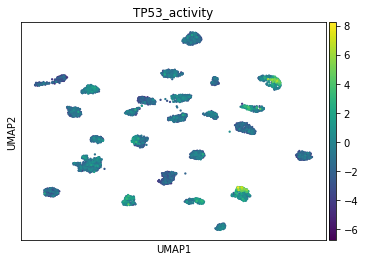

In [54]:
sc.pl.umap(adata_concat, color= ['TP53_activity']) 

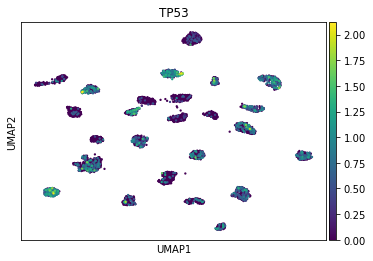

In [55]:
sc.pl.umap(adata_concat, color = ['TP53'])

In [56]:
#adata_concat.obs['TP53_mut_count'] = (adata_concat.obs['TP53_mut_count']>0)*1

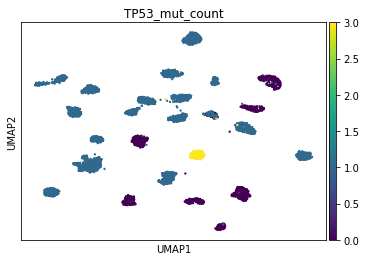

In [57]:
sc.pl.umap(adata_concat, color=['TP53_mut_count'])

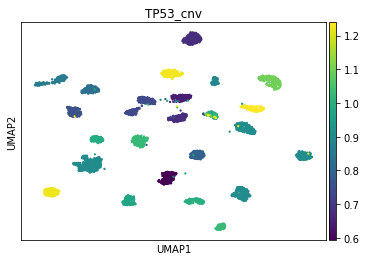

In [58]:
sc.pl.umap(adata_concat, color=['TP53_cnv'])

## Assessing TP53 activity

Calculating the correlation between mutation counts and activity of TP53.

In [59]:
pearsonr(adata_concat.obs['TP53_mut_count'], adata_concat.obs['TP53_activity'])

(-0.37226722630855424, 5.506668200077899e-188)

Plotting the TP53 activity in regard to the batches and mutation counts.

Text(0, 0.5, 'TP53 activity')

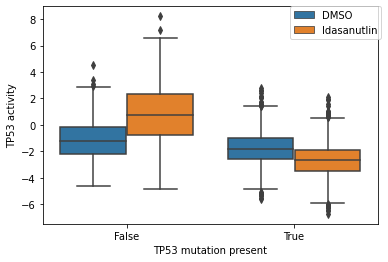

In [90]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['TP53_activity'], 
            x=adata_concat.obs['TP53_mut_count']>0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.xlabel('TP53 mutation present')
plt.ylabel('TP53 activity')

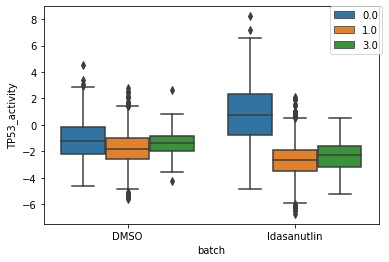

In [61]:
sns.boxplot(hue=adata_concat.obs['TP53_mut_count'], y=adata_concat.obs['TP53_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

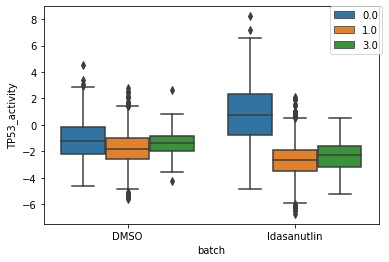

In [62]:
sns.boxplot(hue=adata_concat.obs['TP53_mut_count'], y=adata_concat.obs['TP53_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## Fitting models: TP53 activity

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

https://www.statsmodels.org/devel/example_formulas.html

In [63]:
model = smf.ols('TP53_activity ~ TP53_mut_count + batch', data=adata_concat.obs).fit()

In [64]:
model.params

Intercept              -0.754772
batch[T.Idasanutlin]   -0.186859
TP53_mut_count         -1.073771
dtype: float64

In [65]:
model.pvalues

Intercept                6.634713e-70
batch[T.Idasanutlin]     2.347207e-05
TP53_mut_count          5.908410e-184
dtype: float64

In [66]:
model = smf.ols('TP53_activity ~ TP53_mut_count * batch', data=adata_concat.obs).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TP53_activity   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     496.0
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.60e-286
Time:                        21:20:11   Log-Likelihood:                -10834.
No. Observations:                5735   AIC:                         2.168e+04
Df Residuals:                    5731   BIC:                         2.170e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.3324      0.049    -27.466      0.000      -1.428      -1.237
batch[T.Idasanutlin]                    1.0251      0.070     14.584      0.000       0.887       1.163
TP53_mut_count                         -0.3221      0.049     -6.589      0.000      -0.418      -0.226
TP53_mut_count:batch[T.Idasanutlin]    -1.4886      0.069    -21.635      0.000      -1.624      -1.354
==============================================================================
Omnibus:                      645.111   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.964
Skew:                           0.787   Prob(JB):                    2.05e-232
Kurtosis:                       4.410   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.params

Intercept                             -1.332440
batch[T.Idasanutlin]                   1.025086
TP53_mut_count                        -0.322140
TP53_mut_count:batch[T.Idasanutlin]   -1.488644
dtype: float64

In [69]:
model.pvalues

Intercept                              4.002229e-156
batch[T.Idasanutlin]                    2.466009e-47
TP53_mut_count                          4.828969e-11
TP53_mut_count:batch[T.Idasanutlin]    7.546313e-100
dtype: float64

# CEVIChE cell viability prediction

Download the necessary
<a href="https://saezlab.shinyapps.io/ceviche/_w_a1dec541/session/b0540761d9da082a04bdf713f386ec99/download/download_achilles_model?w=a1dec541" target="_blank">achilles_model.csv</a>. The common genes are listed, then the *'Predicted_viability'* is calculated and added to the dataframe.

In [70]:
ceviche = pd.read_csv('../data/achilles_model.csv', sep=',', header=0, index_col=0)

In [71]:
common_genes = list(set(adata_concat.var.index) & set(ceviche.index))

In [72]:
len(common_genes)

967

In [73]:
gex = adata_concat.to_df()

In [74]:
gex = gex[common_genes]
ceviche = ceviche.loc[common_genes]

In [75]:
cell_viability = np.dot(gex, ceviche)

In [76]:
cell_viability.shape

(5735, 1)

In [77]:
adata_concat.obs['Predicted_viability'] = cell_viability

The predicted viability is comparable to the TP53 activity and the mutation counts.

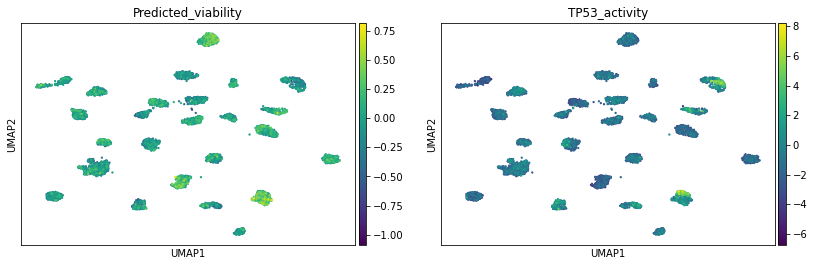

In [78]:
sc.pl.umap( adata_concat, color = ['Predicted_viability', 'TP53_activity'] )

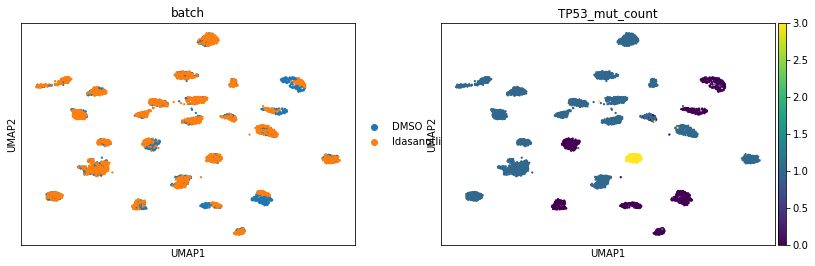

In [79]:
sc.pl.umap( adata_concat, color = ['batch', 'TP53_mut_count'] )

In [80]:
pearsonr(adata_concat.obs['TP53_mut_count'], adata_concat.obs['Predicted_viability'])

(0.03327434765588262, 0.011735230072145674)

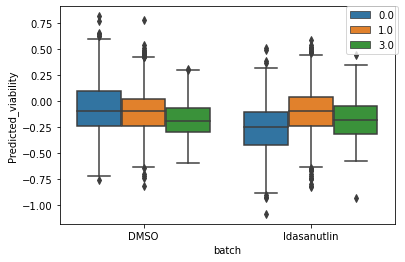

In [81]:
sns.boxplot(hue=adata_concat.obs['TP53_mut_count'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

Text(0, 0.5, 'Predicted viability')

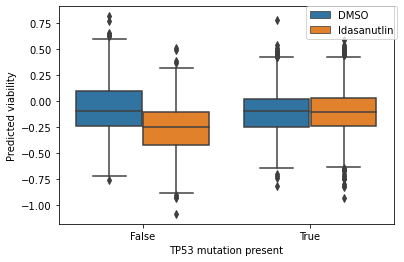

In [93]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['TP53_mut_count']>0*1)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('TP53 mutation present')
plt.ylabel('Predicted viability')

## Fitting models: cell viability

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

In [83]:
model = smf.ols('Predicted_viability ~ TP53_mut_count + batch', data=adata_concat.obs).fit()

In [84]:
model.params

Intercept              -0.105948
batch[T.Idasanutlin]   -0.046267
TP53_mut_count          0.014881
dtype: float64

In [85]:
model.pvalues

Intercept               1.079172e-76
batch[T.Idasanutlin]    5.330199e-15
TP53_mut_count          1.868410e-03
dtype: float64

In [86]:
model = smf.ols('Predicted_viability ~ TP53_mut_count * batch', data=adata_concat.obs).fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Predicted_viability   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     61.46
Date:                 Mon, 03 May 2021   Prob (F-statistic):           4.17e-39
Time:                         21:20:14   Log-Likelihood:                 538.59
No. Observations:                 5735   AIC:                            -1069.
Df Residuals:                     5731   BIC:                            -1043.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0665      0.007     -9.960      0.000      -0.080      -0.053
batch[T.Idasanutlin]                   -0.1290      0.010    -13.335      0.000      -0.148      -0.110
TP53_mut_count                         -0.0364      0.007     -5.414      0.000      -0.050      -0.023
TP53_mut_count:batch[T.Idasanutlin]     0.1016      0.009     10.731      0.000       0.083       0.120
==============================================================================
Omnibus:                       13.115   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.639
Skew:                           0.037   Prob(JB):                     0.000402
Kurtosis:                       3.245   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model.params

Intercept                             -0.066510
batch[T.Idasanutlin]                  -0.129006
TP53_mut_count                        -0.036433
TP53_mut_count:batch[T.Idasanutlin]    0.101630
dtype: float64

In [89]:
model.pvalues

Intercept                              3.504572e-23
batch[T.Idasanutlin]                   5.703981e-40
TP53_mut_count                         6.421399e-08
TP53_mut_count:batch[T.Idasanutlin]    1.302631e-26
dtype: float64